In [13]:
!pip install pandas numpy tensorflow keras-rectified-adam

  Preparing metadata (setup.py) ... done
  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.20.0-py3-none-any.whl size=8255 sha256=080297efa7ec0acc105a4ef108f320932e89566ded6313f57c0124017d118c57
  Stored in directory: /root/.cache/pip/wheels/24/fe/0f/dcf898210ceef6ae45cea51d3d27765f38bce2b4dc8e88245f
Successfully built keras-rectified-adam


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#hist = hist.history
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
train = pd.read_csv(r"train.csv")
test = pd.read_csv(r"test.csv")

<Axes: >

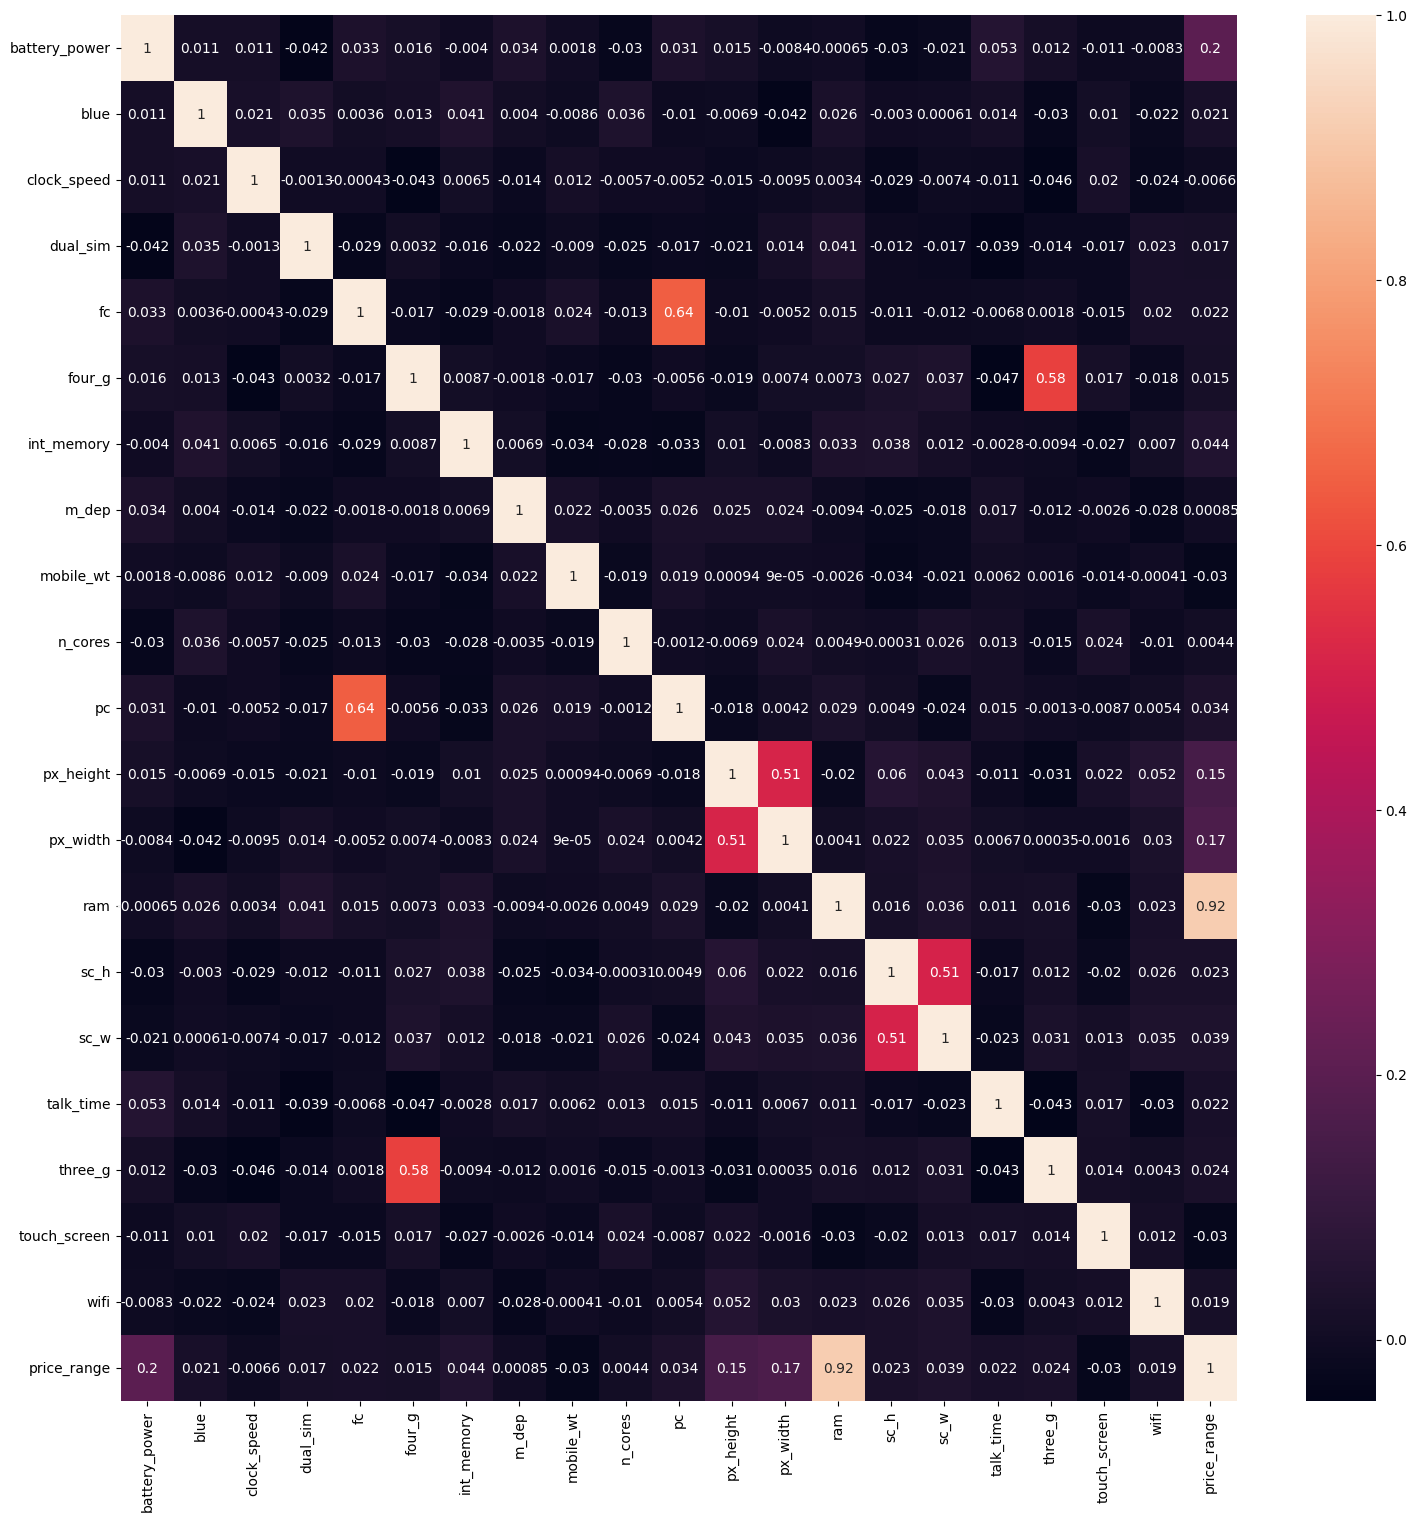

In [3]:
plt.subplots(figsize = (18, 18))
sns.heatmap(train.corr(), annot = True)

In [4]:
correlated_features = set()
correlation_matrix = train.corr()

In [5]:
corr_cols_order = train.corr()['price_range'].sort_values(ascending=False).index
corr_cols_order

Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'pc', 'three_g', 'sc_h', 'fc', 'talk_time',
       'blue', 'wifi', 'dual_sim', 'four_g', 'n_cores', 'm_dep', 'clock_speed',
       'mobile_wt', 'touch_screen'],
      dtype='object')

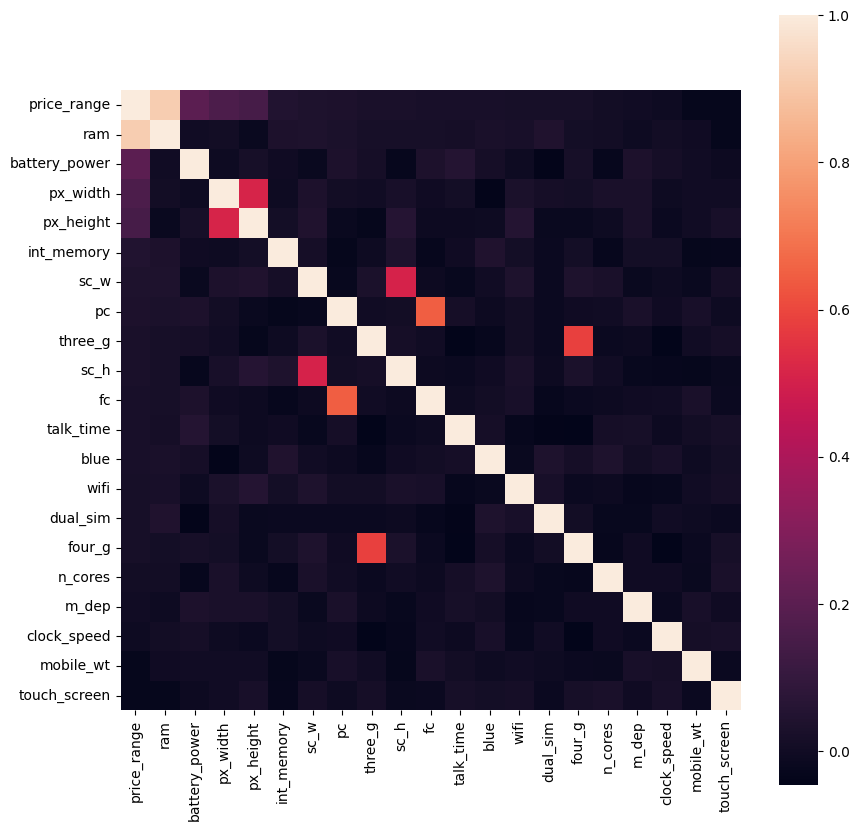

In [6]:
plt.figure(figsize=(10, 10))
sns.heatmap(train[corr_cols_order].corr(), square=True)
plt.show()

In [7]:
train.duplicated().sum()

0

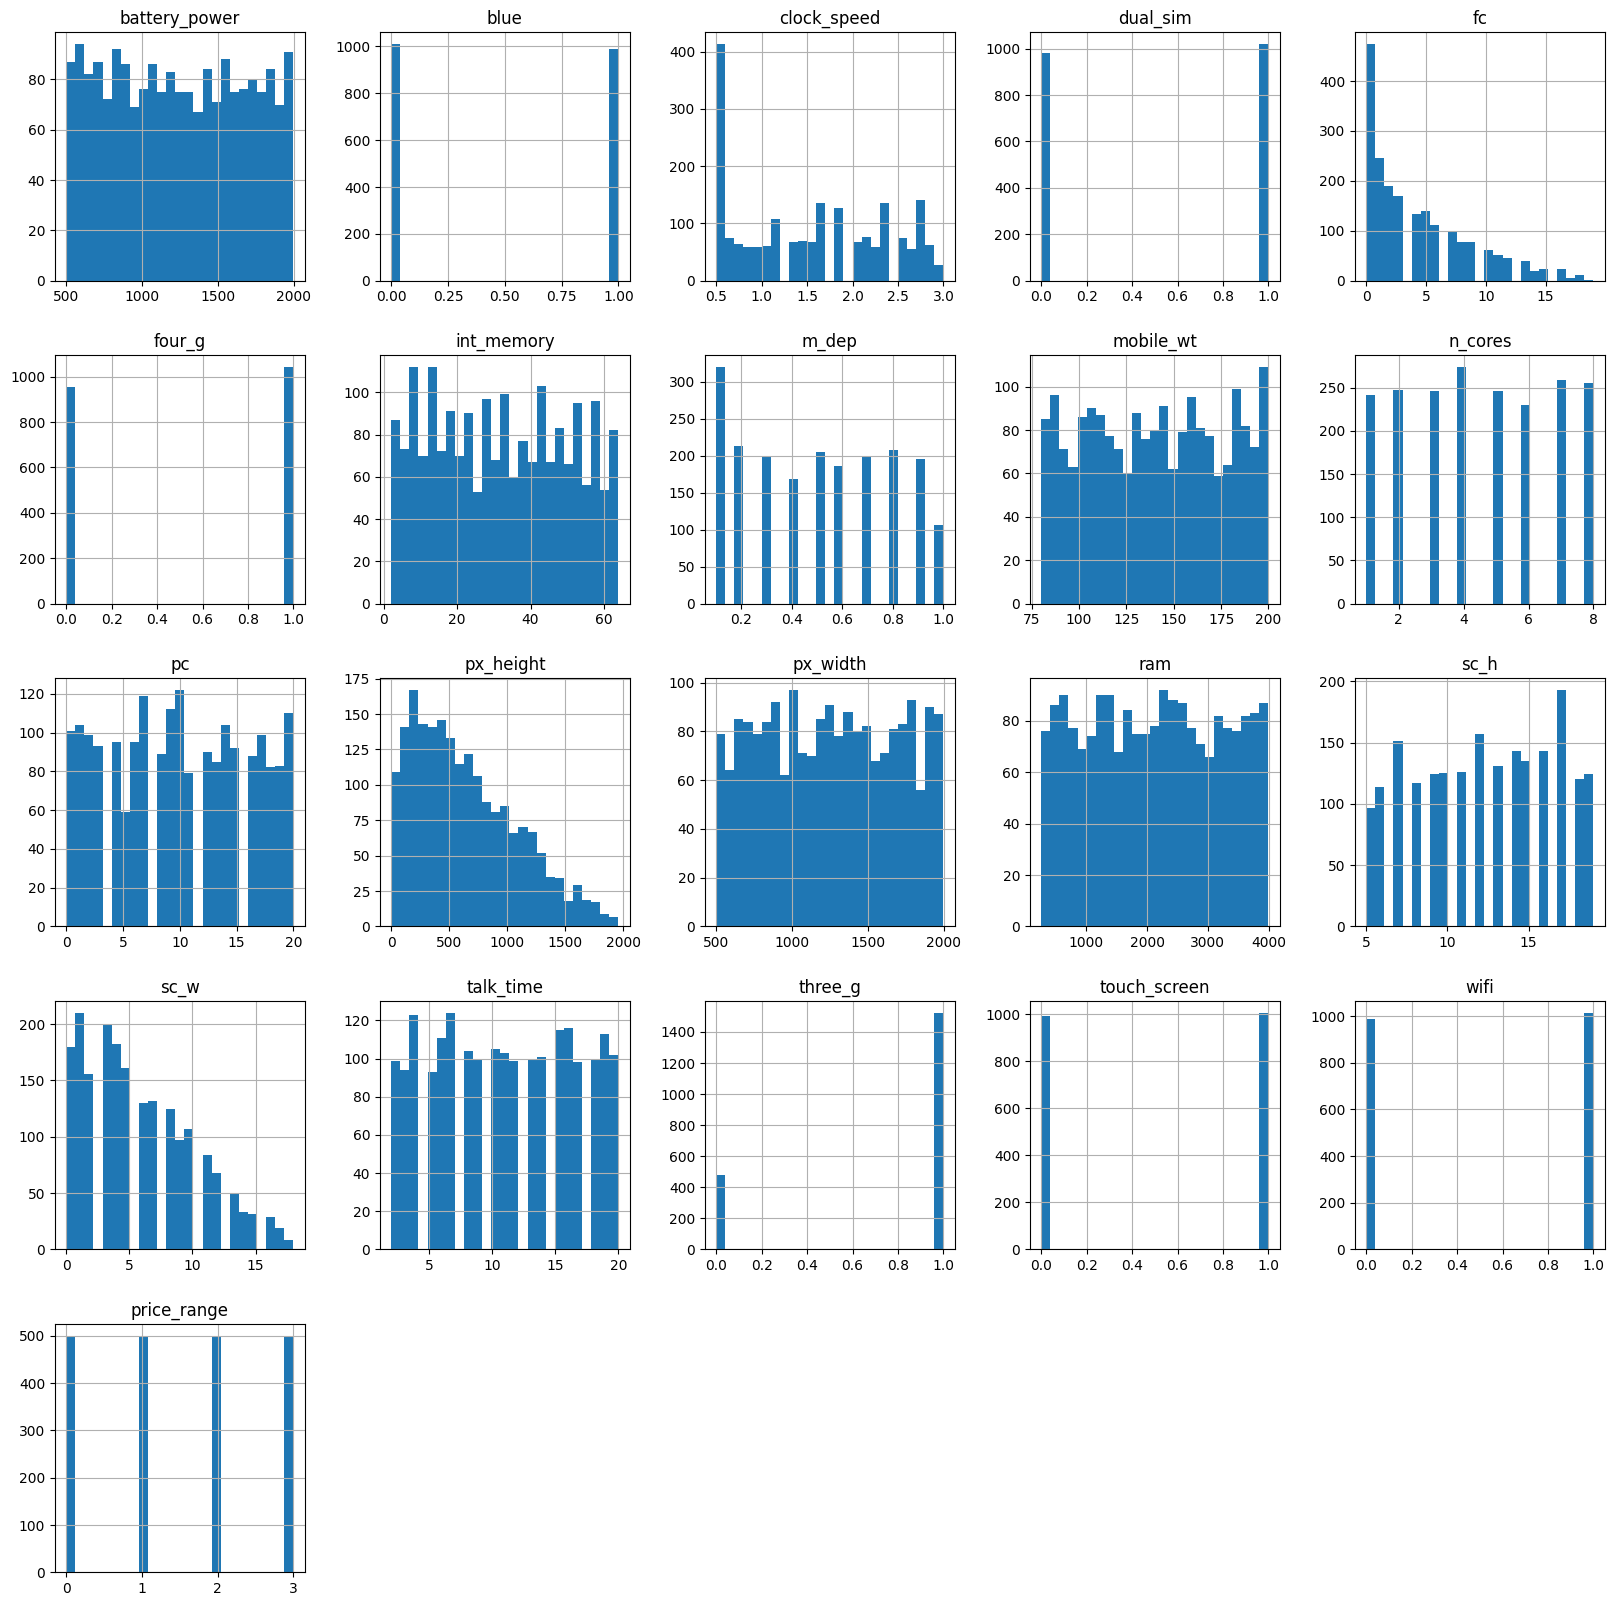

In [8]:
train.hist(bins=25,figsize=(20,20))

In [9]:
# convert to numpy arrays and split features from labels
x = train.drop('price_range', axis=1).values
x_predict = test.drop('id', axis=1).values
y =train['price_range'].values

In [10]:
# Scale the data using StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x_predict = sc.fit_transform(x_predict)

In [11]:
# OneHot Encoding for labels
ohe = OneHotEncoder()
y= ohe.fit_transform(y.reshape(-1, 1)).toarray()

In [12]:
# Split the data into train and test datasets with ratio 9:1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [15]:
L1L2_model = tf.keras.models.Sequential([
    Dense(64, input_dim=20, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(4, activation='softmax')
])

L1L2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
earlyStoppingCallback = EarlyStopping(patience=50)

history = L1L2_model.fit(x_train, y_train, epochs=400, batch_size=16, validation_split=0.1, callbacks=[earlyStoppingCallback], verbose=0)

L1L2_model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.9710 - loss: 0.2187


[0.2027876079082489, 0.9750000238418579]

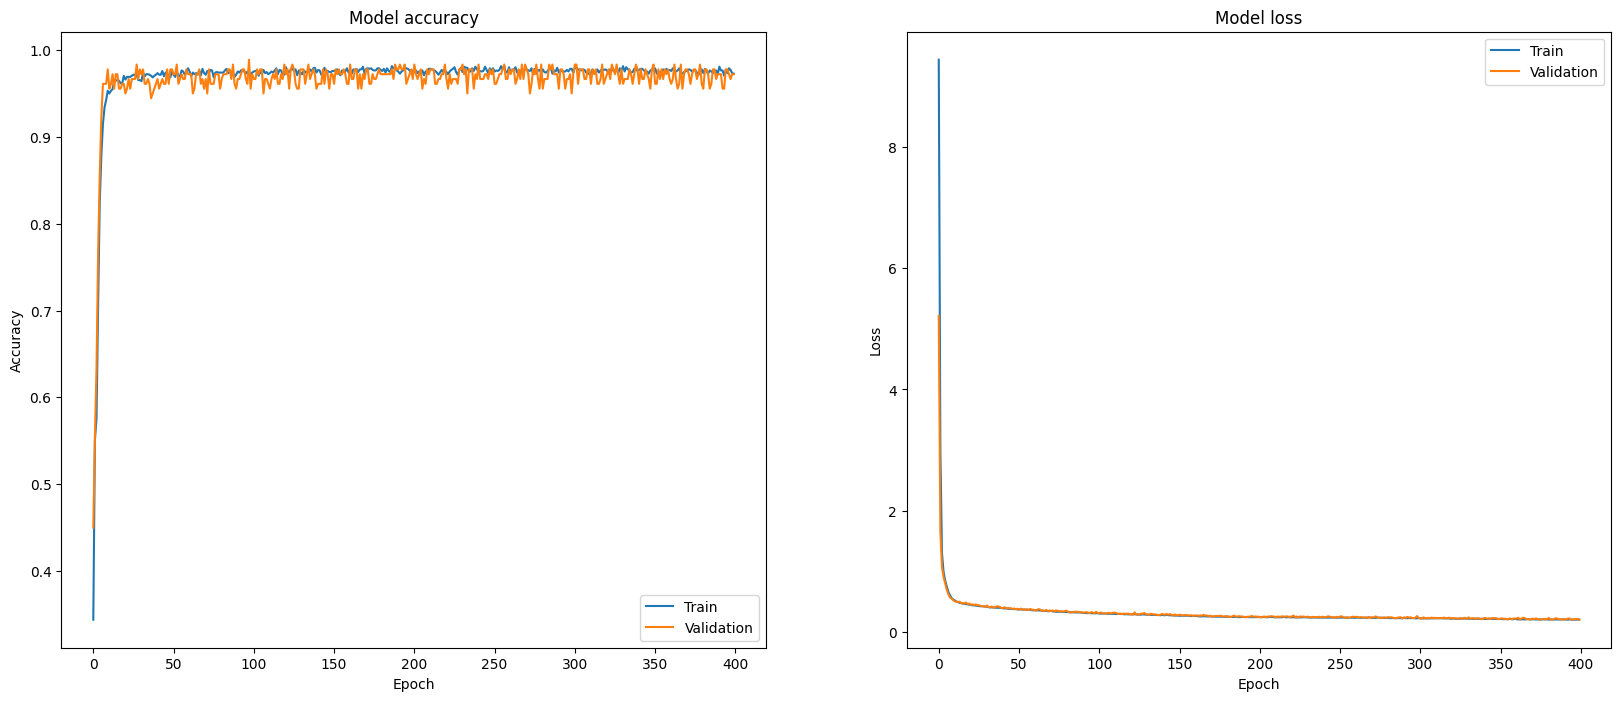

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'])

# Loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'])

plt.show()

In [18]:
y_predict = L1L2_model.predict(x_test)

predictions = list()
for i in range(len(y_predict)):
    predictions.append(np.argmax(y_predict[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [19]:
from sklearn.metrics import classification_report
print(classification_report(test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.94      1.00      0.97        46
           2       0.98      0.95      0.97        66
           3       0.98      0.98      0.98        50

    accuracy                           0.97       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.97      0.98       200



In [20]:
predictions = []

for i in range(len(y_predict)):
    predictions.append(np.argmax(y_predict[i]))

predictions[0:10]

[3, 3, 0, 0, 3, 3, 2, 0, 2, 3]